## Principal Component Analysis: 
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

Let's take the following example where the data is distributed like the diagram on the left:
<img src="PCA_intro1.PNG" width="500">


In the diagram above, we are considering 3 orthogonal(C3 is in the third dimension) axes to show the distribution of data. If you notice the diagram on the right, the first two axes C1 and C2 successfully explain the maximum variation in the data whereas the axes C3 only consists of a fewer number of points. Hence, while considering the principal components C1 and C2 will be our choices.

**Pre-requisite:** PCA assumes that the mean of all the individual columns is zero and the standard deviation is 1. So, before applying PCA, the data should be pre-processed appropriately.

Let’s take a simple example to understand it: 

Let’s suppose we have the following dataset:

<img src="table.PNG" width="300">
`

#### Steps to Calculate PCA

**Note:**
**- PCA often assumes that rows are observations, while columns are variables; that is the reason why you need to transpose. What PCA does is to generate, through orthogonalization, new variables, which represent the original ones. In the first new variable, that we call 'component', you have a different loading for each one of the original stations. The number of component to retain is not fixed and may vary depending on data.**
* Let’s plot this on the XY plane and calculate the average of the magnitude of all the points. Blue ones are the actual points and the yellow one is the average point.

<img src="points.PNG" width="300">

* Move the points so that the average point is on the origin. This is called a parallel translation. Although the coordinates of the points have changed, the corresponding distances among them remain the same.

<img src="move_average.PNG" width="300">

* Create the best fit line for the new data points. We first start with a random line(blue one), and then try to find the best fit line(the green one) so that the distance from individual data points is minimum and consequently the distance from origin is maximum. This best fit line is called Principal component1 or PC1.

<img src="best_fit.PNG" width="300">

* PC2 is a line perpendicular to the PC1.
* Then the axes PC1 and PC2 are rotated in a way that PC1 becomes the horizontal axis.
<img src="axis_rotate.PNG" width="300">
* Then based on the sample points the new points are projected using PC1 and PC2. Thus we get the derived features. 
<img src="projected_points.PNG" width="300">

**HOW TO SELECT OPTIMAL NUMBER OF PC'S?**
## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components. 
<img src="scree.PNG" width="500">

As shown in the given diagram, around 75 principal components explain approximately 90 % of the variance. Hence, 75 can be a good choice based on the scenario

Magically, eigen-decomposition (or PCA) finds the line where
1. the spread of values along the black line is **maximal**
2. the projection error (sum of red lines) is **minimal**

<img src="https://i.stack.imgur.com/Q7HIP.gif">

# **UNDERSTANDING THE MATHEMATICS BEHIND PCA**

**STEPS INVOLVED IN PCA**
1. Standardize the data.
2. Find out covariance of transposed data.
3. Calculate eigen value and eigen vector(also called as pca components).
4. Select the highest eigen value.
5. Calculate PC1 by performing matrix calculation of scaled data and eigen vector of highest eigen value.
6. Calculate the explained variance ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:\\Users\\Priyanshu Chauhan\\Downloads\\PCA.csv")
df 

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
df.drop(columns='Univ', inplace=True)

In [4]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [5]:
sc = StandardScaler()

x = sc.fit_transform(df)

In [6]:
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [7]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,25.0,1266.44,108.359771,1005.0,1240.0,1285.0,1340.0,1415.0
Top10,25.0,76.48,19.433905,28.0,74.0,81.0,90.0,100.0
Accept,25.0,39.20,19.727308,14.0,24.0,36.0,50.0,90.0
SFRatio,25.0,12.72,4.067350,6.0,11.0,12.0,14.0,25.0
Expenses,25.0,27388.00,14424.883165,8704.0,15140.0,27553.0,34870.0,63575.0
GradRate,25.0,86.72,9.057778,67.0,81.0,90.0,94.0,97.0


In [9]:
x.T

array([[ 0.41028362,  1.39925928, -0.06065717,  0.41028362,  0.12771914,
         0.69284809,  0.4573777 , -0.10775125,  1.25797704,  0.36318954,
         1.06960072, -0.06065717, -0.10775125, -1.7466252 ,  1.02250664,
        -2.46245521,  0.88122441, -1.8031381 , -0.24903349,  0.2219073 ,
        -0.81416244,  0.17481322, -0.39031573, -1.70894994,  1.02250664],
       [ 0.6575195 ,  1.23521235, -0.76045386, -0.02520842,  0.34241431,
         0.6575195 ,  0.71003703, -0.13024348,  0.76255456, -0.07772595,
         0.92010716,  0.44744937,  0.23737924, -2.02087462,  0.76255456,
        -2.54604994,  0.71003703, -1.44318177,  0.97262469, -0.07772595,
        -0.60290126,  0.18486171,  0.02730912, -1.91583956,  0.97262469],
       [-0.88986682, -0.73465749,  1.02438157, -0.78639393, -0.32076595,
        -0.83813038, -0.47597528, -0.78639393, -1.30375836,  0.24833493,
        -0.47597528, -0.01034729,  0.14486204,  0.76569936, -1.30375836,
         2.6282113 , -0.9933397 ,  1.43827311,  0

In [10]:
cov = np.cov(x.T)
cov

array([[ 1.04166667,  0.96096065, -0.92276   , -0.84640803,  0.81143331,
         0.77886664],
       [ 0.96096065,  1.04166667, -0.89498031, -0.67024493,  0.63694439,
         0.7770229 ],
       [-0.92276   , -0.89498031,  1.04166667,  0.6579829 , -0.5817078 ,
        -0.85369741],
       [-0.84640803, -0.67024493,  0.6579829 ,  1.04166667, -0.81441604,
        -0.58429345],
       [ 0.81143331,  0.63694439, -0.5817078 , -0.81441604,  1.04166667,
         0.40999107],
       [ 0.77886664,  0.7770229 , -0.85369741, -0.58429345,  0.40999107,
         1.04166667]])

In [11]:
values,vectors = np.linalg.eig(cov)

In [12]:
values

array([4.80425527, 0.81960016, 0.02755274, 0.29850193, 0.17060428,
       0.12948562])

In [13]:
vectors

array([[-0.45774863, -0.03968044,  0.8580547 , -0.1870388 ,  0.13124033,
         0.02064583],
       [-0.42714437,  0.19993153, -0.39607492, -0.49780855,  0.37489567,
         0.4820162 ],
       [ 0.42430805, -0.32089297,  0.21693361,  0.15627899,  0.0612872 ,
         0.8010936 ],
       [ 0.39064831,  0.43256441,  0.1720479 , -0.60608085, -0.50739095,
         0.07682369],
       [-0.36252316, -0.6344864 , -0.17376309, -0.20474114, -0.62340055,
         0.07254775],
       [-0.37940403,  0.51555367, -0.00353754,  0.53247261, -0.43863341,
         0.33810965]])

In [14]:
vectors[:,0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [15]:
pc1 = x@vectors[:,0]
pc1

array([-1.00987445, -2.82223781,  1.11246577, -0.74174122, -0.31191206,
       -1.69669089, -1.24682093, -0.33874978, -2.37415013, -1.40327739,
       -1.72610332, -0.45085748,  0.04023814,  3.23373034, -2.23626502,
        5.17299212, -1.69964377,  4.578146  ,  0.82260312, -0.09776213,
        1.9631826 , -0.54228894,  0.53222092,  3.54869664, -2.30590032])

In [16]:
pc2 = x@vectors[:,1]
pc2

array([ 1.06430962, -2.25904458, -1.63120889,  0.04218747,  0.63524357,
        0.34436328,  0.49098366,  0.78516859,  0.38653888, -2.11951503,
       -0.08823712,  0.01113295,  1.00920438,  0.37458049,  0.37179329,
       -0.77991535,  0.30559745,  0.34759136,  0.69890615, -0.65044645,
        0.22476756,  0.07958884,  1.0171672 , -0.77846167,  0.11770432])

# PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()

pcs = pd.DataFrame(pca.fit_transform(x),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [19]:
pcs

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921
5,-1.696691,-0.344363,-0.253408,0.012564,-0.052661,-0.027166
6,-1.246821,-0.490984,-0.032094,-0.205644,0.293505,-0.078012
7,-0.338750,-0.785169,-0.493585,0.039856,-0.544979,-0.155372
8,-2.374150,-0.386539,0.116098,-0.453366,-0.230108,0.266984
9,-1.403277,2.119515,-0.442827,-0.632543,0.230054,-0.235615


In [20]:
pca.explained_variance_ratio_

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.76868084, 0.89981687, 0.94757718, 0.97487386, 0.99559156,
       1.        ])

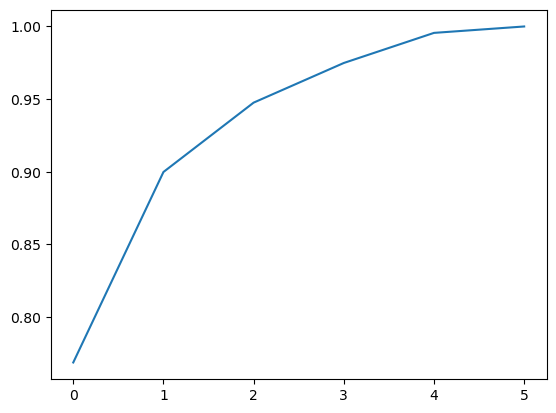

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)

In [24]:
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [25]:
pd.DataFrame(pcs)

,0,1
0,-1.009874,-1.064310
1,-2.822238,2.259045
2,1.112466,1.631209
3,-0.741741,-0.042187
4,-0.311912,-0.635244
5,-1.696691,-0.344363
6,-1.246821,-0.490984
7,-0.338750,-0.785169
8,-2.374150,-0.386539
9,-1.403277,2.119515
